## **Initial Design Space**

To get recommendations for novel data to sample in order to enhance an emulator, a general assumption is that a surrogate model exists. This need not be the case. There are applications where it is necessary to start with some particular scheme of sampling to effectively span the entire design space at hand. `twinLab` can do this with a simple call to the function `Emulator.design` where `Emulator` is the class that contains the attributes and methods of the surrogate model we wish to build.

In this notebook, we will see:

- How to get recommendations of points to be sampled in the design space before training an emulator


Let's start by importing all the necessary packages and dependencies


In [1]:
# Package imports
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# twinLab imports
import twinlab as tl


          ====== TwinLab Client Initialisation ======
          Version     : 2.3.0
          Server      : https://twinlab.digilab.co.uk/dev
          Environment : /Users/mead/digiLab/twinLab-Demos/.env



`twinLab` allows the user to specify the prior distribution for each of the input dimensions. Here, these priors are in the form of uniform distributions that are defined with a lower and upper bound. Let's go ahead and create priors for a two-dimensional input.

In [2]:
# Define the upper and lower bounds for the uniform distribution
xmin1, xmax1 = 4.0, 6.0
xmin2, xmax2 = -1.0, 1.0

# Define the number of points to be sampled
num_samples = 10

# Create a list of Prior objects that contains the distribution for each dimension
priors = [
    tl.Prior("x1", tl.distributions.Uniform(xmin1, xmax1)),
    tl.Prior("x2", tl.distributions.Uniform(xmin2, xmax2)),
]

Now, we can call the `design` method of the `Emulator` class. The function takes in a list of priors (one prior for each input variable), a sampling method which specifies the strategy, and a number of points to be sampled. This function returns a `pandas` `DataFrame` that contains the recommended points.

Let's first generate some samples with the Latin Hypercube Sampling method.

In [3]:
# Initialise an emulator
emulator = tl.Emulator("test_emulator")

# Call the design method to sample some data points with Latin Hypercube sampling
initial_points_lhc = emulator.design(priors, num_samples, tl.DesignParams())
display(initial_points_lhc)

,x1,x2
0,4.795092,0.967552
1,5.949430,0.093370
2,5.517012,0.701943
3,5.162868,0.326473
4,5.324355,-0.396642
5,5.615062,-0.726492
6,4.203090,0.553954
7,4.833321,-0.432540
8,4.466239,-0.809777
9,4.137707,-0.169766


We can also generate some samples with a Uniform Random method by using `sampling_method = tl.sampling.UniformRandom()`.

In [4]:
# Define the InitialDesignParams object with Uniform Random Sampling Method
params = tl.DesignParams(sampling_method=tl.sampling.UniformRandom())

# Call the design method to sample some data points with Uniform Random sampling
initial_points_random = emulator.design(
    priors=priors, num_points=num_samples, params=params
)
display(initial_points_random)

,x1,x2
0,5.373530,-0.571849
1,5.538120,0.702064
2,4.424013,-0.807835
3,5.621540,0.102676
4,5.709290,-0.244333
5,5.033427,0.837502
6,4.537827,-0.615082
7,4.058950,-0.819632
8,4.750597,-0.006111
9,5.021604,-0.731750


We can plot the generated samples on a two-dimensional plot and visualise them.


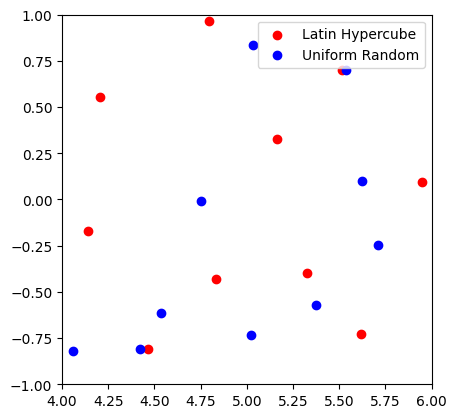

In [5]:
# Create 2-D scatter plot to visualise the generated data points
plt.scatter(initial_points_lhc["x1"], initial_points_lhc["x2"], color="red", label="Latin Hypercube")
plt.scatter(initial_points_random["x1"], initial_points_random["x2"], color="blue", label="Uniform Random")
plt.xlim(xmin1, xmax1)
plt.ylim(xmin2, xmax2)
plt.legend()
plt.gca().set_aspect("equal")
plt.show()

We can see that the recommended points are from different regions of the space and this is a good way to start with when there is no initial data at hand. Moreover, we can see that the Latin Hypercube design fills the space more evenly than Uniform Random sampling.

## **Three-dimensional plots**

To understand this better, let's also try visualising some data in three dimensions. As in two dimensions, we start with defining the priors for each dimension.



In [6]:
# Define the priors for the 3 dimensions
xmin1, xmax1 = 0, 1
xmin2, xmax2 = -1, 1
xmin3, xmax3 = 1, 5
num_samples = 20
priors = [
    tl.Prior("x1", tl.distributions.Uniform(xmin1, xmax1)),
    tl.Prior("x3", tl.distributions.Uniform(xmin3, xmax3)),
    tl.Prior("x2", tl.distributions.Uniform(xmin2, xmax2)),
]

Generate some points in the three-dimensional space using the Latin HyperCube sampling method.


In [7]:
# Initialise an emulator
new_emulator = tl.Emulator("3D_emulator")

# Define the InitialDesignParams object
params = tl.DesignParams()

# Call the design method to sample some data points with Latin Hypercube sampling
initial_points_lhc = emulator.design(
    priors, num_samples, params=params
)
display(initial_points_lhc)

,x1,x3,x2
0,0.364299,2.773275,-0.280882
1,0.880245,3.728567,-0.508109
2,0.492062,1.403298,-0.487518
3,0.258452,3.400909,0.783490
4,0.958268,3.215234,-0.163921
5,0.778866,2.471547,-0.827208
6,0.420841,4.272122,0.968591
7,0.061393,4.003845,-0.367617
8,0.812099,4.464009,0.393948
9,0.908175,1.812421,0.891721


Let's also do the same with Uniform Random sampling for comparison.


In [8]:
# Define the DesignParams object with Uniform Random Sampling Method
params = tl.DesignParams(sampling_method=tl.sampling.UniformRandom())

# Generate the points with Uniform Random sampling and display
initial_points_random = emulator.design(
    priors, num_samples, params=params
)
display(initial_points_random)

,x1,x3,x2
0,0.212175,2.629163,0.912377
1,0.605587,1.419057,-0.556525
2,0.496495,1.327426,0.324903
3,0.897260,1.544083,0.807672
4,0.125929,3.510153,0.583155
5,0.915172,1.499606,0.095305
6,0.388147,3.988658,0.228526
7,0.054433,1.501711,-0.358882
8,0.748014,1.671552,-0.739590
9,0.816057,1.190767,-0.517428


Let's plot a nice three-dimensional visualisation of the data points generated using the `design` method with both the Latin Hypercube and Uniform Random sampling schemes. Feel free to move the plot around an visualise the data across the various dimensions.


In [9]:
# Create 3D scatter plot
fig = go.Figure()

# Add the first set of points
fig.add_trace(
    go.Scatter3d(
        x=initial_points_random["x1"],
        y=initial_points_random["x2"],
        z=initial_points_random["x3"],
        mode="markers",
        name="Uniform Random",
    )
)

# Add the second set of points
fig.add_trace(
    go.Scatter3d(
        x=initial_points_lhc["x1"],
        y=initial_points_lhc["x2"],
        z=initial_points_lhc["x3"],
        mode="markers",
        name="Latin Hypercube",
    )
)

# Set labels and title
fig.update_layout(
    scene=dict(xaxis_title="x1", yaxis_title="x2", zaxis_title="x3"),
    title="3D Scatter Plot",
    width=900,
    height=600,
)

# Show plot
fig.show()

We can also visualise the two-dimensional projections of the sampled points in each of the three possible two-dimensional projections from three dimensions. This can help us understand how the different sampling strategies are covering the design space across various dimensions. You can see that the Latin Hypercube design fills the space well in the projected dimensions


In [10]:
# Set layout options
fig.update_layout(scene=dict(aspectmode="auto"))

# Create 2D projections on each plane
fig.update_layout(scene_camera=dict(eye=dict(x=2, y=0, z=0)), width=600, height=550)
fig.show()

fig.update_layout(scene_camera=dict(eye=dict(x=0, y=0, z=2)), width=600, height=550)
fig.show()

fig.update_layout(scene_camera=dict(eye=dict(x=0, y=2, z=0)), width=600, height=550)
fig.show()